<a href="https://colab.research.google.com/github/Beczheng/sqlite_database_operations/blob/main/HHA_504_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing packages

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import sqlite3

# 2. Loading the datasets

In [2]:
# Loading a price transparency dataset from New York Presbyterian Hospital

NYP_df = pd.read_json('NYP_Standard_Charges.json')
NYP_df

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [3]:
# Loading a price transparency dataset from St. Joseph Hospital

SJ_df = pd.read_excel('St_Joseph_Hospital_Standard_Charges.xlsx')
SJ_df

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,NaN,NaN,NaN,NaN,NaN
1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,NaN,NaN,NaN,NaN,NaN
2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,NaN,NaN,NaN,NaN,NaN
3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,NaN,NaN,NaN,NaN,NaN
4,3603621500,HC 1ST ORD SEL CATH ART THORAC,360,36215,908.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65023,6370000002,XRX ZONISAMIDE 25 MG PO CAPS,250,NaN,316.0,62756-258-02,100.0,each,Bottle,100 each
65024,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,0378-6726-01,100.0,each,Bottle,100 each
65025,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,62756-259-02,100.0,each,Bottle,100 each
65026,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,68001-243-00,100.0,each,Bottle,100 each


# 3. Cleaning the datasets

## Removing duplicates

In [4]:
# Removing duplicates in the New York Presbyterian Hospital datatset

NYP_df_drop_duplicates = NYP_df.drop_duplicates()
NYP_df_drop_duplicates

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [5]:
# Removing duplicates in the St. Joseph Hospital dataset

SJ_df_drop_duplicates = SJ_df.drop_duplicates()
SJ_df_drop_duplicates

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,NaN,NaN,NaN,NaN,NaN
1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,NaN,NaN,NaN,NaN,NaN
2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,NaN,NaN,NaN,NaN,NaN
3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,NaN,NaN,NaN,NaN,NaN
4,3603621500,HC 1ST ORD SEL CATH ART THORAC,360,36215,908.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65023,6370000002,XRX ZONISAMIDE 25 MG PO CAPS,250,NaN,316.0,62756-258-02,100.0,each,Bottle,100 each
65024,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,0378-6726-01,100.0,each,Bottle,100 each
65025,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,62756-259-02,100.0,each,Bottle,100 each
65026,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,68001-243-00,100.0,each,Bottle,100 each


## Checking for missing values

In [6]:
# Checking for missing values in the New York Presbyterian Hospital datatset

NYP_df_drop_duplicates.isna().sum()

Code (CPT/DRG)                          0
Description                             0
Rev Code                                0
Inpatient/Outpatient                    0
Gross Charges                           0
Discounted Cash Price                   0
Aetna                                   0
Cigna                                   0
Empire Blue Cross Blue Shield           0
Emblem Health                           0
United Health Group                     0
Aetna Medicare                          0
AgeWell Medicare                        0
Emblem Medicare                         0
Empire Medicare                         0
Fidelis Medicare                        0
Healthfirst Medicare                    0
UHC Community Plan/United Medicare      0
VNS Medicare                            0
WellCare Medicare                       0
1199                                    0
Affinity Molina Essential               0
Affinity Molina Medicaid/CHP            0
Amida Care Medicaid               

In [7]:
# Checking for missing values in the St. Joseph Hospital datatset

SJ_df_drop_duplicates.isna().sum()

Billing/Charge Code        0
Charge Description         0
Rev Code                   0
CPT/HCPC               14468
Price                     92
NDC                    51047
Package Size           51047
Package Unit           51047
Package Description    51110
Charge Quantity        51047
dtype: int64

## Dropping missing values

In [8]:
# Dropping missing values in the New York Presbyterian Hospital datatset

NYP_df_drop_missing = NYP_df_drop_duplicates.dropna()
NYP_df_drop_missing

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [9]:
# Dropping missing values in the St. Joseph Hospital dataset

SJ_df_drop_missing = SJ_df_drop_duplicates.dropna()
SJ_df_drop_missing

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
52316,6360000001,XRX (NICU) BEVACIZUMAB INTRAVITREAL INJECTION ...,636,C9257,35.0,99999-006-50,0.025,mL,Syringe,.025 mL
52328,6360000001,XRX ABATACEPT 125 MG/ML SC SOSY,636,J0129,8744.0,0003-2188-11,1.000,mL,Syringe,1 mL
52329,6360000001,XRX ABATACEPT 250 MG IV SOLR,636,J0129,8984.0,0003-2187-13,1.000,each,Vial,1 each
52330,6360000001,XRX ABCIXIMAB 2 MG/ML IV SOLN,636,J0130,9303.0,57894-200-01,5.000,mL,Vial,5 mL
52331,6360349002,XRX ABEMACICLIB 100 MG PO TABS,636,C9399,23764.0,0002-4815-54,14.000,each,Box,14 each
...,...,...,...,...,...,...,...,...,...,...
65002,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,1622.0,67457-619-10,100.000,mL,Vial,100 mL
65003,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2070.0,55111-688-52,100.000,mL,Bottle,100 mL
65004,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2415.0,25021-830-82,100.000,mL,Flex Cont,100 mL
65005,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,5717.0,23155-186-31,100.000,mL,Bottle,100 mL


## Cleaning columns

In [10]:
# Cleaning the columns in the New York Presbyterian Hospital dataset

def clean_column(df):
  def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

  df.columns = [clean_name(col) for col in df.columns]
  return df

NYP_clean_df = clean_column(NYP_df_drop_missing)
NYP_clean_df

,codecptdrg,description,revcode,inpatientoutpatient,grosscharges,discountedcashprice,aetna,cigna,empirebluecrossblueshield,emblemhealth,...,consumerhealthnetwork,devon,equian,firsthealth,magnacare,multiplanbeechstreetphcs,qhm,worldwide,minimumnegotiatedcharge,maximumnegotiatedcharge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [11]:
# Cleaning the columns in the St. Joseph Hospital dataset

def clean_column(df):
  def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

  df.columns = [clean_name(col) for col in df.columns]
  return df

SJ_clean_df = clean_column(SJ_df_drop_missing)
SJ_clean_df

,billingchargecode,chargedescription,revcode,cpthcpc,price,ndc,packagesize,packageunit,packagedescription,chargequantity
52316,6360000001,XRX (NICU) BEVACIZUMAB INTRAVITREAL INJECTION ...,636,C9257,35.0,99999-006-50,0.025,mL,Syringe,.025 mL
52328,6360000001,XRX ABATACEPT 125 MG/ML SC SOSY,636,J0129,8744.0,0003-2188-11,1.000,mL,Syringe,1 mL
52329,6360000001,XRX ABATACEPT 250 MG IV SOLR,636,J0129,8984.0,0003-2187-13,1.000,each,Vial,1 each
52330,6360000001,XRX ABCIXIMAB 2 MG/ML IV SOLN,636,J0130,9303.0,57894-200-01,5.000,mL,Vial,5 mL
52331,6360349002,XRX ABEMACICLIB 100 MG PO TABS,636,C9399,23764.0,0002-4815-54,14.000,each,Box,14 each
...,...,...,...,...,...,...,...,...,...,...
65002,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,1622.0,67457-619-10,100.000,mL,Vial,100 mL
65003,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2070.0,55111-688-52,100.000,mL,Bottle,100 mL
65004,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2415.0,25021-830-82,100.000,mL,Flex Cont,100 mL
65005,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,5717.0,23155-186-31,100.000,mL,Bottle,100 mL


## Renaming columns

In [12]:
# Renaming the columns in the New York Presbyterian Hospital dataset

NYP_new_df = NYP_clean_df.rename(columns={'codecptdrg' : 'code_cpt_drg', 'revcode' : 'rev_code', 'inpatientoutpatient' : 'inpatient_or_outpatient', 'grosscharges' : 'gross_charges', 'discountedcashprice' : 'discounted_cash_price', 'empirebluecrossblueshield' : 'empire_blue_cross_blue_shied', 'emblemhealth' : 'emblem_health', 'unitedhealthgroup' : 'united_health_group', 'aetnamedicare' : 'aetna_medicare', 'unitedcommunityplanmedicaid' : 'united_community_planned_medicaid', 'vnsmedicaid' : 'vns_medicaid', 'consumerhealthnetwork' : 'consumer_health_network', 'firsthealth' : 'first_health', 'magnacare' : 'magna_care', 'multiplanbeechstreetphcs' : 'multi_plan_beech_street_phcs', 'minimumnegotiatedcharge' : 'minimum_negotiated_charge', 'maximumnegotiatedcharge' : 'maximum_negotiated_charge'})
NYP_new_df

,code_cpt_drg,description,rev_code,inpatient_or_outpatient,gross_charges,discounted_cash_price,aetna,cigna,empire_blue_cross_blue_shied,emblem_health,...,consumer_health_network,devon,equian,first_health,magna_care,multi_plan_beech_street_phcs,qhm,worldwide,minimum_negotiated_charge,maximum_negotiated_charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [13]:
# Renaming the columns in the St. Joseph Hospital dataset

SJ_new_df = SJ_clean_df.rename(columns={'billingchargecode' : 'billing_charge_code', 'chargedescription' : 'charge_description', 'revcode' : 'rev_code', 'cpthcpc' : 'cpt_or_hcpc', 'packagesize' : 'package_size', 'packageunit' : 'package_unit', 'packagedescription' : 'package_description', 'chargequantity' : 'charge_quantity'})
SJ_new_df

,billing_charge_code,charge_description,rev_code,cpt_or_hcpc,price,ndc,package_size,package_unit,package_description,charge_quantity
52316,6360000001,XRX (NICU) BEVACIZUMAB INTRAVITREAL INJECTION ...,636,C9257,35.0,99999-006-50,0.025,mL,Syringe,.025 mL
52328,6360000001,XRX ABATACEPT 125 MG/ML SC SOSY,636,J0129,8744.0,0003-2188-11,1.000,mL,Syringe,1 mL
52329,6360000001,XRX ABATACEPT 250 MG IV SOLR,636,J0129,8984.0,0003-2187-13,1.000,each,Vial,1 each
52330,6360000001,XRX ABCIXIMAB 2 MG/ML IV SOLN,636,J0130,9303.0,57894-200-01,5.000,mL,Vial,5 mL
52331,6360349002,XRX ABEMACICLIB 100 MG PO TABS,636,C9399,23764.0,0002-4815-54,14.000,each,Box,14 each
...,...,...,...,...,...,...,...,...,...,...
65002,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,1622.0,67457-619-10,100.000,mL,Vial,100 mL
65003,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2070.0,55111-688-52,100.000,mL,Bottle,100 mL
65004,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2415.0,25021-830-82,100.000,mL,Flex Cont,100 mL
65005,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,5717.0,23155-186-31,100.000,mL,Bottle,100 mL


## Checking the data type

In [14]:
# Checking the data type for each column in the New York Presbyterian Hospital datatset

NYP_new_df.dtypes

code_cpt_drg                          object
description                           object
rev_code                              object
inpatient_or_outpatient               object
gross_charges                        float64
discounted_cash_price                float64
aetna                                 object
cigna                                 object
empire_blue_cross_blue_shied          object
emblem_health                         object
united_health_group                   object
aetna_medicare                        object
agewellmedicare                       object
emblemmedicare                        object
empiremedicare                        object
fidelismedicare                       object
healthfirstmedicare                   object
uhccommunityplanunitedmedicare        object
vnsmedicare                           object
wellcaremedicare                      object
1199                                  object
affinitymolinaessential               object
affinitymo

In [15]:
# Checking the data type for each column in the St. Joseph Hospital datatset

SJ_new_df.dtypes

billing_charge_code      int64
charge_description      object
rev_code                 int64
cpt_or_hcpc             object
price                  float64
ndc                     object
package_size           float64
package_unit            object
package_description     object
charge_quantity         object
dtype: object

## Changing the data type

In [16]:
# Changing data types in the St. Joseph Hospital datatset

SJ_new_df[['billing_charge_code', 'rev_code']] = SJ_new_df[['billing_charge_code', 'rev_code']].astype(object)

# 4. Conducting summary statistics

## Summary statistics for numerical values

In [17]:
# Conducting summary statistics for numerical values in the New York Presbyterian Hospital datatset

NYP_new_df.describe()

,gross_charges,discounted_cash_price,minimum_negotiated_charge,maximum_negotiated_charge
count,5.912000e+03,5.912000e+03,5912.000000,5.912000e+03
mean,3.355080e+04,3.355080e+04,2249.918880,2.390277e+04
std,9.718759e+04,9.718759e+04,6015.717204,7.136503e+04
min,1.000000e+00,1.000000e+00,0.454400,1.608000e+00
25%,5.835000e+02,5.835000e+02,122.228437,6.380010e+02
50%,3.968000e+03,3.968000e+03,431.142905,4.086731e+03
75%,3.163600e+04,3.163600e+04,2107.000000,1.925640e+04
max,2.538980e+06,2.538980e+06,204861.126000,1.713460e+06


In [18]:
# Conducting summary statistics for numerical values in values for the St. Joseph Hospital dataset

SJ_new_df.describe()

,price,package_size
count,4140.000000,4140.000000
mean,3624.753382,62.376016
std,18289.269447,183.825265
min,1.000000,0.025000
25%,38.000000,1.000000
50%,133.000000,5.000000
75%,781.750000,50.000000
max,431958.000000,5000.000000


## Summary statistics for categorical values

In [19]:
# Conducting summary statistics for catergorical values in the New York Presbyterian Hospital datatset

NYP_new_df.describe(include='object')

,code_cpt_drg,description,rev_code,inpatient_or_outpatient,aetna,cigna,empire_blue_cross_blue_shied,emblem_health,united_health_group,aetna_medicare,...,united_community_planned_medicaid,vns_medicaid,consumer_health_network,devon,equian,first_health,magna_care,multi_plan_beech_street_phcs,qhm,worldwide
count,5912,5912,5912,5912,5912,5912,5912,5912.0,5912,5912,...,5912,5912,5912.0000,5912.0000,5912.0000,5912.0000,5912.0000,5912.0000,5912.0000,5912.0000
unique,5912,5652,98,2,2109,1863,2539,2251.0,2562,1529,...,1137,1137,3986.0000,3986.0000,3986.0000,3986.0000,3986.0000,3986.0000,3986.0000,3986.0000
top,96360,KNEE ARTHROSCOPY/SURGERY,0360,Inpatient/Outpatient,9144,7496,11924,9474.4,6002,Not separately payable,...,Not separately payable,Not separately payable,55.4368,55.4368,55.4368,55.4368,55.4368,55.4368,55.4368,55.4368
freq,1,16,1918,5189,1652,1827,530,1893.0,425,1209,...,446,446,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000


In [20]:
# Conducting summary statistics for numerical values in values for the St. Joseph Hospital dataset

SJ_new_df.describe(include='object')

,billing_charge_code,charge_description,rev_code,cpt_or_hcpc,ndc,package_unit,package_description,charge_quantity
count,4140,4140,4140,4140,4140,4140,4140,4140
unique,30,1386,7,561,3695,7,18,119
top,6360000001,XRX FENTANYL CITRATE 50 MCG/ML IJ SOLN (WRAPPER),636,J3490,99999-003-46,mL,Vial,1 each
freq,3669,33,3944,275,8,3095,2500,802


# 5. Creating data distribution graphs

## Graph for the New York Presbyterian Hospital datatset

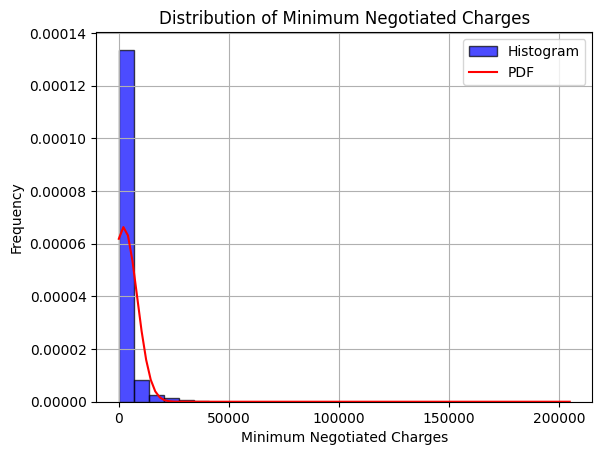

In [21]:
# Visualizing distribution of minimum negotiated charge through a histogram

# Normal distribution

mean = 2249.918880
std_dev = 6015.717204
num_samples = 1000

# Creating a histogram

plt.hist(NYP_new_df['minimum_negotiated_charge'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogram')

# Create a probability density function (PDF) curve

x = np.linspace(min(NYP_new_df['minimum_negotiated_charge']), max(NYP_new_df['minimum_negotiated_charge']), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='red', label='PDF')

plt.title('Distribution of Minimum Negotiated Charges')
plt.xlabel('Minimum Negotiated Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Graph for the St. Joseph Hospital dataset

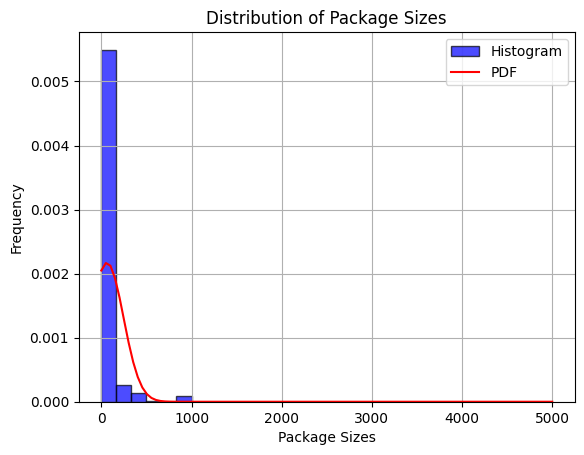

In [22]:
# Visualizing distribution of price through a histogram

# Normal distribution

mean = 62.376016
std_dev = 183.825265
num_samples = 1000

# Creating a histogram

plt.hist(SJ_new_df['package_size'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogram')

# Create a probability density function (PDF) curve

x = np.linspace(min(SJ_new_df['package_size']), max(SJ_new_df['package_size']), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='red', label='PDF')

plt.title('Distribution of Package Sizes')
plt.xlabel('Package Sizes')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 6. Creating a temporary databse using SQLite

## Manual table creation

In [23]:
# Creating a new database and calling it "health.db"

conn = sqlite3.connect('health.db')
c = conn.cursor()

In [24]:
# Creating a new table and calling it "SJH"

c.execute("""
            CREATE TABLE SJH
                (
                    billing_charge_code text,
                    charge_description text,
                    rev_code text,
                    cpt_or_hcpc text,
                    price real,
                    ndc text,
                    package_size real,
                    package_unit text,
                    package_description text,
                    charge_quantity text
                );
          """)

conn.commit()

In [25]:
# Confirming that the new table exists

c.execute("""
            SELECT name
            FROM sqlite_master
            WHERE type='table'
            ORDER BY name;
          """)

print(c.fetchall())

[('SJH',)]


In [26]:
# Creating a new row for the SJH table

sql_query = """
  INSERT INTO SJH (
    'billing_charge_code',
    'charge_description',
    'rev_code',
    'cpt_or_hcpc',
    'price',
    'ndc',
    'package_size',
    'package_unit',
    'package_description',
    'charge_quantity'
    )
    values (
      '6360000001',
      'XRX Zoster Vaccine Live 19400 UNT/0.65ML SC SUSR',
      '636',
      '90736',
      1540.00,
      '0006-4963-00',
      1.00,
      'each',
      'vial',
      '1 each'
    );
"""

print(sql_query)


  INSERT INTO SJH (
    'billing_charge_code',
    'charge_description',
    'rev_code',
    'cpt_or_hcpc',
    'price',
    'ndc',
    'package_size',
    'package_unit',
    'package_description',
    'charge_quantity'
    )
    values (
      '6360000001',
      'XRX Zoster Vaccine Live 19400 UNT/0.65ML SC SUSR',
      '636',
      '90736',
      1540.00,
      '0006-4963-00',
      1.00,
      'each',
      'vial',
      '1 each'
    );



In [27]:
# Executing sql_query (inserting the new row into the SJH table)

c.execute(sql_query)
conn.commit()

In [28]:
# Executing sql_query_2 (confirming that the new row exists in the SJH table)

sql_query_2 = """
  SELECT *
  FROM SJH;
"""

c.execute(sql_query_2)
print(c.fetchall())

[('6360000001', 'XRX Zoster Vaccine Live 19400 UNT/0.65ML SC SUSR', '636', '90736', 1540.0, '0006-4963-00', 1.0, 'each', 'vial', '1 each')]


## Automatic table creation

In [29]:
# Creating an engine to connect to the SQLite database

engine = create_engine('sqlite:///health.db')

In [30]:
# Creating a pandas dataframe for the new table

pd.read_sql_query('SELECT * FROM SJH', conn)

,billing_charge_code,charge_description,rev_code,cpt_or_hcpc,price,ndc,package_size,package_unit,package_description,charge_quantity
0,6360000001,XRX Zoster Vaccine Live 19400 UNT/0.65ML SC SUSR,636,90736,1540.0,0006-4963-00,1.0,each,vial,1 each


## Replacing data

In [31]:
# Replacing the SJH data with New York Presbyterian Hospital data

NYP_new_df.to_sql('SJH', conn, if_exists='replace')

new_query = """
SELECT *
FROM SJH
limit 3;
"""

response = pd.read_sql(new_query, conn)
response

,index,code_cpt_drg,description,rev_code,inpatient_or_outpatient,gross_charges,discounted_cash_price,aetna,cigna,empire_blue_cross_blue_shied,...,consumer_health_network,devon,equian,first_health,magna_care,multi_plan_beech_street_phcs,qhm,worldwide,minimum_negotiated_charge,maximum_negotiated_charge
0,0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.0,866.0,641.706,494.486,640.84,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.04825,1388.424000
1,1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.0,358.0,265.278,204.418,264.92,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.90325,1990.891341
2,2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.0,1397.0,1035.177,797.687,1033.78,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.04825,1475.508000
